In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from scipy.io import loadmat
import random

# Define the paths for forged and original video datasets
forged_path = Path('/kaggle/input/video-tampering-dataset/videos/Forged')
original_path = Path('/kaggle/input/video-tampering-dataset/videos/Original')
groundtruth_path = Path('/kaggle/input/video-tampering-dataset/groundtruth')

# Initialize variables for training data and frame counts
train_frames = []
forged_frames_count = 0
original_frames_count = 0

# Process forged videos
print("Processing forged videos...")
for forged_video in forged_path.glob('*.mp4'):
    print(f"Processing: {forged_video.name}")
    cap = cv2.VideoCapture(str(forged_video))
    frame_count = 0

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        train_frames.append(frame)
        frame_count += 1

    forged_frames_count += frame_count
    print(f"Number of Frames: {frame_count}")
    cap.release()

print(f"Total Frames in Forged Directory: {forged_frames_count}")

# Process original videos
print("Processing original videos...")
for original_video in original_path.glob('*.mp4'):
    print(f"Processing: {original_video.name}")
    cap = cv2.VideoCapture(str(original_video))
    frame_count = 0

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        train_frames.append(frame)
        frame_count += 1

    original_frames_count += frame_count
    print(f"Number of Frames: {frame_count}")
    cap.release()

print(f"Total Frames in Original Directory: {original_frames_count}")
print(f"Total Frames Processed: {len(train_frames)}")

# Define a helper function to determine if a frame is forged based on its mask
def is_forged(img):
    return int(np.any(img == 1))

# Initialize labels for the training data
labels = []

# Process ground truth data to generate labels
print("Processing ground truth data...")
for gt_file in groundtruth_path.glob('*.mat'):
    print(f"Processing: {gt_file.name}")
    mask = loadmat(str(gt_file))['GT'].reshape((-1, 240, 320))
    print(f"Number of Frames in Ground Truth: {mask.shape[0]}")

    for i in range(mask.shape[0]):
        labels.append(is_forged(mask[i]))

print(f"Total Labels from Ground Truth: {len(labels)}")

# Pad the remaining frames (original data has no forged frames) with 0 labels
labels += [0] * (len(train_frames) - len(labels))
print(f"Total Labels after Padding: {len(labels)}")

# Shuffle data and labels together
print("Shuffling data...")
combined = list(zip(train_frames, labels))
random.shuffle(combined)
train_frames[:], labels[:] = zip(*combined)

# Convert to numpy arrays for saving
print("Converting data to numpy arrays...")
Xtrain = np.array(train_frames)
Ytrain = np.array(labels, dtype='float32')

print(f"Training Data Shape: {Xtrain.shape}")
print(f"Training Labels Shape: {Ytrain.shape}")

# Save the processed data
np.save("/kaggle/working/Xtrain.npy", Xtrain)
np.save("/kaggle/working/Ytrain.npy", Ytrain)

print("Data saved successfully!")


Processing forged videos...
Processing: 01_forged.mp4
Number of Frames: 210
Processing: 04_forged.mp4
Number of Frames: 319
Processing: 06_forged.mp4
Number of Frames: 262
Processing: 05_forged.mp4
Number of Frames: 583
Processing: 09_forged.mp4
Number of Frames: 554
Processing: 10_forged.mp4
Number of Frames: 239
Processing: 02_forged.mp4
Number of Frames: 329
Processing: 08_forged.mp4
Number of Frames: 274
Processing: 03_forged.mp4
Number of Frames: 313
Processing: 07_forged.mp4
Number of Frames: 412
Total Frames in Forged Directory: 3495
Processing original videos...
Processing: 01_original.mp4
Number of Frames: 210
Processing: 07_original.mp4
Number of Frames: 412
Processing: 04_original.mp4
Number of Frames: 319
Processing: 02_original.mp4
Number of Frames: 329
Processing: 05_original.mp4
Number of Frames: 583
Processing: 09_original.mp4
Number of Frames: 554
Processing: 08_original.mp4
Number of Frames: 274
Processing: 10_original.mp4
Number of Frames: 239
Processing: 03_original

(6990, 240, 320, 3)
(6990,)


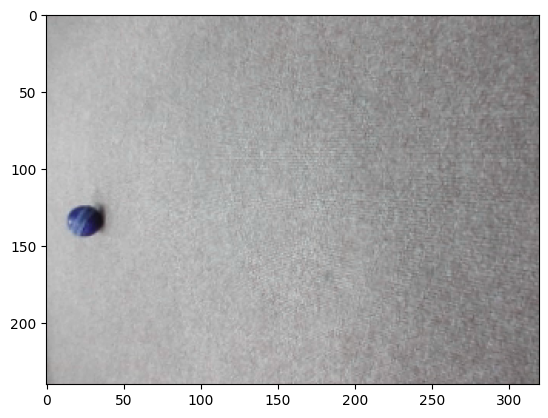

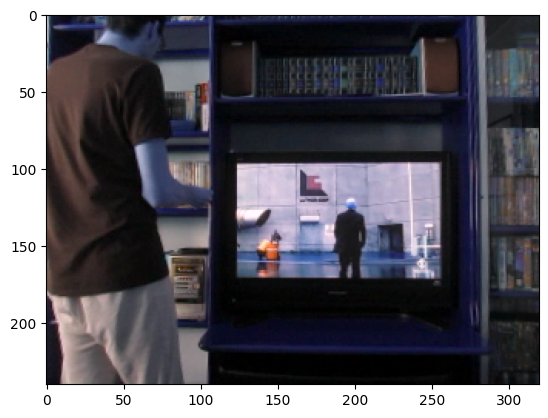

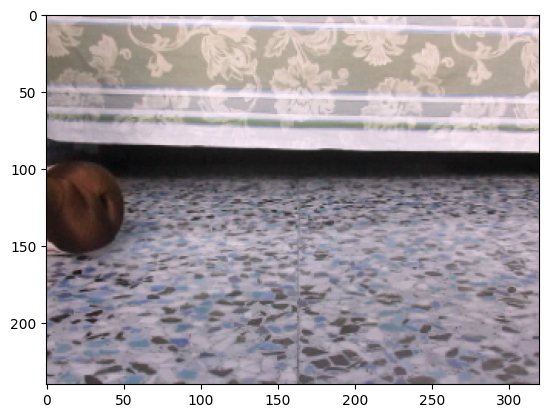

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 240, 320, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 246, 326, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 120, 160, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 120, 160, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 120, 160, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 122, 162, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 60, 80, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 60, 80, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 60, 80, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 60, 80, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 60, 80, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 60, 80, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 60, 80, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 60, 80, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 60, 80, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 23,718,913 (90.48 MB)

 Trainable params: 23,665,793 (90.28 MB)

 Non-trainable params: 53,120 (207.50 KB)

Epoch 1/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 174s 644ms/step - accuracy: 0.7289 - loss: 0.5478 - val_accuracy: 0.7818 - val_loss: 0.5156
Epoch 2/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 85s 483ms/step - accuracy: 0.7842 - loss: 0.4192 - val_accuracy: 0.7890 - val_loss: 0.4976
Epoch 3/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 93s 534ms/step - accuracy: 0.7900 - loss: 0.4019 - val_accuracy: 0.7790 - val_loss: 0.4003
Epoch 4/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 92s 524ms/step - accuracy: 0.7893 - loss: 0.3897 - val_accuracy: 0.7933 - val_loss: 0.4005
Epoch 5/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 91s 521ms/step - accuracy: 0.7954 - loss: 0.3826 - val_accuracy: 0.7740 - val_loss: 0.4100
Epoch 6/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 94s 535ms/step - accuracy: 0.7961 - loss: 0.3782 - val_accuracy: 0.7897 - val_loss: 0.3842
Epoch 7/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 94s 537ms/step - accuracy: 0.7980 - loss: 0.3606 - val_accuracy: 0.8004 - val_loss: 0.3615
Epoch 8/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 92s 524ms/step - accuracy: 0.7898 - loss: 

In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
from keras.applications.resnet50 import ResNet50
from keras.layers import Dropout, GlobalAveragePooling2D, Dense
from keras.optimizers import Adam
from keras.models import Model
from keras.callbacks import ModelCheckpoint

# Load preprocessed training data
Xtrain = np.load("/kaggle/working/Xtrain.npy")
Ytrain = np.load("/kaggle/working/Ytrain.npy")

# Display shapes of the training data
print(Xtrain.shape)  # Shape of the input video frames
print(Ytrain.shape)  # Shape of the labels

# Visualize a few random training examples
for i in range(3):
    r = np.random.randint(Xtrain.shape[0])  # Select a random index
    plt.imshow(Xtrain[r])  # Display the frame
    plt.show()

# Define the ResNet model
# Load ResNet50 without the top layer, using ImageNet weights
model = ResNet50(input_shape=(240, 320, 3), include_top=False, weights='imagenet')

# Add custom layers for binary classification
dr = Dropout(0.2)(model.output)  # Dropout layer for regularization
gap1 = GlobalAveragePooling2D()(dr)  # Global average pooling layer
fc1 = Dense(64, activation='relu')(gap1)  # Fully connected layer with ReLU activation
fc2 = Dense(1, activation='sigmoid')(fc1)  # Fully connected layer for binary output

# Create the new model
model_new = Model(inputs=model.input, outputs=fc2)

# Print the model summary
model_new.summary()

# Compile the model with the correct optimizer argument
adam = Adam(learning_rate=1e-4)  # Optimizer with a low learning rate
model_new.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

# Set up a checkpoint to save the best model during training
checkpoint = ModelCheckpoint(
    "/kaggle/working/videoforgerymodel.keras",
    save_best_only=True
)

# Train the model
hist = model_new.fit(
    Xtrain, Ytrain,
    batch_size=32,  # Number of samples per batch
    epochs=20,  # Number of training epochs
    validation_split=0.2,  # Fraction of data used for validation
    callbacks=[checkpoint]  # Save the best model
)


In [8]:
# Save the model after training as videoforgerymodel.h5
model_new.save("/kaggle/working/videoforgerymodel.h5")


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
Xtest = np.load("/kaggle/working/Xtrain.npy")
Ytest = np.load("/kaggle/working/Ytrain.npy")
print(Xtest.shape)
print(Ytest.shape)

(6990, 240, 320, 3)
(6990,)


In [10]:
model = load_model("/kaggle/working/videoforgerymodel.h5")

In [11]:
outputs = model.predict(Xtest)

219/219 ━━━━━━━━━━━━━━━━━━━━ 30s 124ms/step


In [12]:
outputs = outputs.reshape((-1))
print(outputs.shape)

(6990,)


In [13]:
for i in range(outputs.shape[0]):
    if outputs[i] > 0.5:
        outputs[i] = 1
    else:
        outputs[i] = 0
print(outputs)

[0. 0. 0. ... 0. 0. 0.]


In [14]:
positiveCount = 0
for i in range(Xtest.shape[0]):
    if outputs[i] == Ytest[i]:
        positiveCount +=1

print("Test Accuracy = ",positiveCount/Ytest.shape[0])

Test Accuracy =  0.8052932761087268


In [21]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming 'outputs' and 'Ytest' are defined
print(classification_report(Ytest, outputs))

# Calculate the confusion matrix
cm = confusion_matrix(Ytest, outputs)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()


              precision    recall  f1-score   support

         0.0       0.81      0.96      0.88      5273
         1.0       0.73      0.33      0.45      1717

    accuracy                           0.81      6990
   macro avg       0.77      0.64      0.67      6990
weighted avg       0.79      0.81      0.78      6990



In [30]:
cnf_matrix = confusion_matrix(outputs,Ytest)
print(cnf_matrix)

[[5069 1157]
 [ 204  560]]


In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming 'outputs' and 'Ytest' are your predicted and true values
cnf_matrix = confusion_matrix(Ytest, outputs)

# Create the confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=["Original", "Forged"])

# Plot the confusion matrix
plt.style.use('dark_background')
disp.plot(cmap="Blues", values_format='d')

plt.title("Confusion Matrix")
plt.show()


In [66]:
import cv2
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt

# Load the trained model
model = load_model("/kaggle/working/videoforgerymodel.h5")

# Path to the test video (replace with your own test video path)
test_video_path = '/kaggle/input/video-tampering-dataset/videos/Forged/01_forged.mp4'

# Function to extract frames from the video
def extract_frames(video_path):
    cap = cv2.VideoCapture(video_path)
    frames = []
    
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        # Resize frames to match model input size (240x320)
        frame_resized = cv2.resize(frame, (320, 240))
        frames.append(frame_resized)
        
    cap.release()
    return np.array(frames)

# Extract frames from the test video
test_frames = extract_frames(test_video_path)
print(f"Total Frames in Test Video: {test_frames.shape[0]}")

# Normalize the frames to the same scale as the training data (if needed)
test_frames = test_frames / 255.0

# Predict with the trained model
predictions = model.predict(test_frames)

# If you want to predict whether the video is forged or not, you can take the average of the frame-wise predictions
# This will give you a probability of the video being forged
video_prediction = np.mean(predictions)

# If the average prediction is > 0.5, classify the video as forged
is_forged = video_prediction > 0.5
print(f"Video is {'Forged' if is_forged else 'Original'} (Prediction: {video_prediction:.2f})")

# Optionally, visualize a few frames with predictions
for i in range(min(3, test_frames.shape[0])):  # Show up to 3 frames
    plt.imshow(test_frames[i])
    plt.title(f"Prediction: {'Forged' if predictions[i] > 0.5 else 'Original'}")
    plt.show()


Total Frames in Test Video: 210
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 496ms/step
Video is Original (Prediction: 0.46)


In [64]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
vid_src = "/kaggle/input/video-tampering-dataset/videos/Original/02_original.mp4"
vid = []

sumframes =0
cap= cv2.VideoCapture(vid_src)
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == False:
        break
    sumframes +=1
    vid.append(frame)
cap.release()
    
print("No. Of Frames in the Video: ",sumframes)

Xtest = np.array(vid)
#print(Xtest.shape)
from keras.models import load_model
model = load_model("/kaggle/working/videoforgerymodel.h5")

output = model.predict(Xtest)
output = output.reshape((-1))

results = []
for i in output:
    if i>0.5:
        results.append(1)
    else:
        results.append(0)
#print(len(results))
#print(results)
forge_flag = 0
for i in results:
    if i == 1:
        forge_flag = 1
        break
        
if forge_flag == 0:
    print("The video is not forged")
    
else:
    print("The video is forged")
    print("Number of Forged Frames in the video: ",sum(results))

No. Of Frames in the Video:  329
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 340ms/step
The video is not forged


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
vid_src = "/kaggle/input/video-tampering-dataset/videos/Forged/06_forged.mp4"
vid = []

sumframes =0
cap= cv2.VideoCapture(vid_src)
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == False:
        break
    sumframes +=1
    vid.append(frame)
cap.release()
    
print("No. Of Frames in the Video: ",sumframes)

Xtest = np.array(vid)
#print(Xtest.shape)
from keras.models import load_model
model = load_model("/kaggle/working/videoforgerymodel.h5")

output = model.predict(Xtest)
output = output.reshape((-1))

results = []
for i in output:
    if i>0.5:
        results.append(1)
    else:
        results.append(0)
#print(len(results))
#print(results)
forge_flag = 0
for i in results:
    if i == 1:
        forge_flag = 1
        break
        
if forge_flag == 0:
    print("The video is not forged")
    
else:
    print("The video is forged")
    print("Number of Forged Frames in the video: ",sum(results))